In [1]:
# -------------------------------------------
# Importing Required Libraries
# -------------------------------------------

import numpy as np # NumPy for numerical operations
import tensorflow as tf # TensorFlow and Keras for deep learning
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt# Matplotlib for data visualization (images, accuracy plots)
from sklearn.metrics import classification_report, confusion_matrix # scikit-learn for performance metrics (accuracy, classification report, etc.)

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
# -------------------------------------------
#  Loading the CIFAR-10 Dataset
# -------------------------------------------
# CIFAR-10 contains 60,000 color images (32x32 pixels) of 10 classes:
# airplane, car, bird, cat, deer, dog, frog, horse, ship, truck.
# It is already split into training and test sets.

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Each image is of shape (32, 32, 3) — meaning height, width, and 3 RGB color channels.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


Before normalization:
Pixel value range: 0 to 255


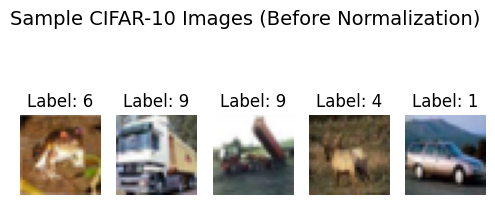

In [3]:
# -------------------------------------------
#  Visualizing Sample Images (Before Normalization)
# -------------------------------------------
# CIFAR-10 images are small and colorful. Before normalization,
# their pixel values range from 0 to 255 (for each RGB channel).

print("Before normalization:")
print("Pixel value range:", X_train.min(), "to", X_train.max())

plt.figure(figsize=(6,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')

plt.suptitle("Sample CIFAR-10 Images (Before Normalization)", fontsize=14)
plt.show()


In [4]:
# -------------------------------------------
#  Normalizing the Dataset
# -------------------------------------------
# Neural networks perform better when inputs are in a small range.
# Dividing by 255 scales pixel values from [0, 255] → [0, 1].
# This helps stabilize training and improves convergence.

X_train = X_train / 255.0
X_test = X_test / 255.0

# For quick experimentation, we’ll use smaller subsets
subset_size = 50000
X_train, y_train = X_train[:subset_size], y_train[:subset_size]
X_test, y_test = X_test[:10000], y_test[:10000]

print("After normalization:")
print("Pixel value range:", X_train.min(), "to", X_train.max())


After normalization:
Pixel value range: 0.0 to 1.0


In [5]:
# -------------------------------------------
#  Building a Simple Artificial Neural Network
# -------------------------------------------
# ANN treats images as flat arrays (ignores spatial structure),
# which is why it performs poorly on image data like CIFAR-10.
# This helps us demonstrate why CNNs are better suited for images.

ann = models.Sequential([
    # Flatten converts the 32x32x3 image into a single 1D array of 3072 values
    layers.Flatten(input_shape=(32, 32, 3)),

    # Dense (fully connected) layers learn general features
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),

    # Output layer — 10 neurons for 10 classes
    layers.Dense(10, activation='softmax')
])

# Compile model: define optimizer, loss function, and metrics
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# -------------------------------------------
#  Training the ANN
# -------------------------------------------
# The model learns patterns by minimizing loss using backpropagation.
# batch_size: number of images processed before weight update
# epochs: number of complete passes through the training dataset

history_ann = ann.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,  # 20% of training data for validation
    verbose=1
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.2773 - loss: 2.0164 - val_accuracy: 0.3694 - val_loss: 1.7845
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.3876 - loss: 1.7257 - val_accuracy: 0.4142 - val_loss: 1.6655
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4109 - loss: 1.6435 - val_accuracy: 0.4261 - val_loss: 1.6176
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4435 - loss: 1.5631 - val_accuracy: 0.4384 - val_loss: 1.5977
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4547 - loss: 1.5289 - val_accuracy: 0.4507 - val_loss: 1.5573


In [7]:
# -------------------------------------------
#  Evaluating the ANN on Test Data
# -------------------------------------------
# Accuracy on unseen test data shows how well the model generalizes.

ann_loss, ann_acc = ann.evaluate(X_test, y_test, verbose=0)
print(f"ANN Test Accuracy: {ann_acc*100:.2f}%")


ANN Test Accuracy: 45.99%


In [8]:
# -------------------------------------------
#  Building a Convolutional Neural Network (CNN)
# -------------------------------------------
# CNNs are specifically designed for image data.
# They preserve spatial relationships and learn local patterns
# like edges, textures, and shapes.

cnn = models.Sequential([
    # First convolutional layer: detects simple edges and textures
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second convolutional layer: deeper filters, more complex patterns
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Third convolutional layer: captures high-level abstract features
    layers.Conv2D(64, (3,3), activation='relu'),

    # Flatten and dense layers for final classification
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# -------------------------------------------
#  Training the CNN
# -------------------------------------------
# CNNs take longer to train but capture spatial and color-based features
# that ANNs completely miss out on.

history_cnn = cnn.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 88ms/step - accuracy: 0.3110 - loss: 1.8508 - val_accuracy: 0.4952 - val_loss: 1.3876
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.5344 - loss: 1.3050 - val_accuracy: 0.5807 - val_loss: 1.1944
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.5976 - loss: 1.1366 - val_accuracy: 0.6091 - val_loss: 1.1070
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.6357 - loss: 1.0311 - val_accuracy: 0.6525 - val_loss: 0.9903
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.6790 - loss: 0.9245 - val_accuracy: 0.6605 - val_loss: 0.9627


In [12]:
# -------------------------------------------
#  Evaluating and Comparing ANN vs CNN
# -------------------------------------------

cnn_loss, cnn_acc = cnn.evaluate(X_test, y_test, verbose=0)

print("\n📊 Comparison Summary:")
print(f"ANN Accuracy: {ann_acc*100:.2f}%")
print(f"CNN Accuracy: {cnn_acc*100:.2f}%")



📊 Comparison Summary:
ANN Accuracy: 45.99%
CNN Accuracy: 66.43%

✅ CNN clearly outperforms ANN on image data —
   because it understands spatial patterns, edges, and shapes.


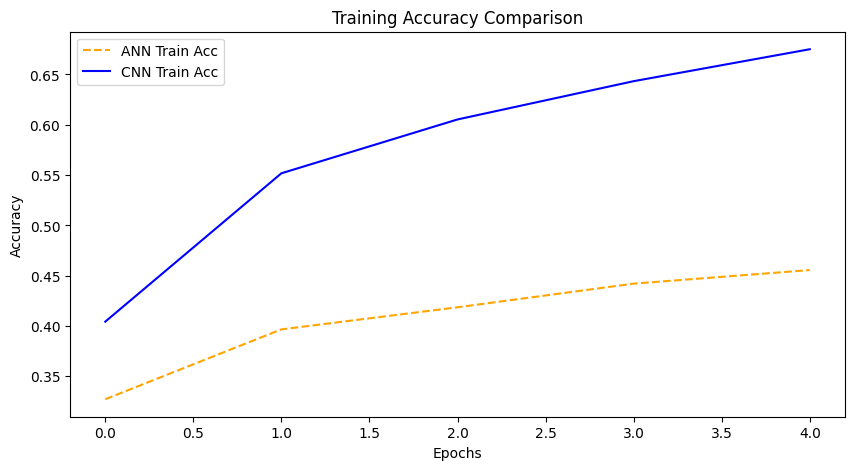

In [11]:
# -------------------------------------------
#  Visualizing Accuracy Progress Over Epochs
# -------------------------------------------

plt.figure(figsize=(10,5))
plt.plot(history_ann.history['accuracy'], label='ANN Train Acc', linestyle='--', color='orange')
plt.plot(history_cnn.history['accuracy'], label='CNN Train Acc', linestyle='-', color='blue')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
